IMPORTING LIBRARIES AND LOOKING THROUGH THE DATA

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\baboo\Documents\crop production\Crop_production.csv")
#printing the first 5 rows
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [5]:
#looking into the summary of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [6]:
#Attributes of the data
print(df.columns)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [7]:
#getting the shape of data
df.shape

(246091, 7)

In [29]:
#looking for any null values
df.isnull().sum()

State_Name           0
District_Name        0
Crop_Year            0
Season               0
Crop                 0
Area                 0
Production           0
Area_Log             0
Production_Log       0
Crop_Encoded         0
Season_Encoded       0
Area_CropYear        0
Area_Season          0
Area_Scaled          0
Production_Scaled    0
dtype: int64

In [31]:
#checking for duplicate values and removing them
df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [30]:
#looking into the basics statistics
df.describe()

,Crop_Year,Area,Production,Area_Log,Production_Log,Crop_Encoded,Season_Encoded,Area_CropYear,Area_Season,Area_Scaled,Production_Scaled
count,187764.000000,187764.000000,187764.000000,187764.000000,187764.000000,187764.000000,187764.000000,1.877640e+05,187764.000000,1.877640e+05,1.877640e+05
mean,2005.708794,1080.235804,1443.794710,5.399681,5.429814,66.805602,2.179784,2.166173e+06,1992.511387,-2.240266e-17,6.781346e-17
std,4.930196,1798.896764,2674.266475,2.134272,2.366898,33.621598,1.269444,3.606928e+06,3794.743339,1.000003e+00,1.000003e+00
min,1997.000000,0.100000,0.000000,0.095310,0.000000,0.000000,0.000000,2.014000e+02,0.000000,-6.004451e-01,-5.398858e-01
25%,2002.000000,49.000000,44.000000,3.912023,3.806662,41.000000,1.000000,9.814700e+04,80.000000,-5.732617e-01,-5.234327e-01
50%,2006.000000,263.000000,294.000000,5.575949,5.686975,63.000000,2.000000,5.281040e+05,480.000000,-4.542995e-01,-4.299488e-01
75%,2010.000000,1198.000000,1456.000000,7.089243,7.284135,100.000000,4.000000,2.397600e+06,2096.000000,6.546485e-02,4.563989e-03
max,2015.000000,9373.000000,16460.000000,9.145695,9.708749,123.000000,5.000000,1.886181e+07,46200.000000,4.609929e+00,5.615089e+00


VISUALISATION OF THE DATA

PIE CHART FOR DIFFERENT ATTRIBUTES

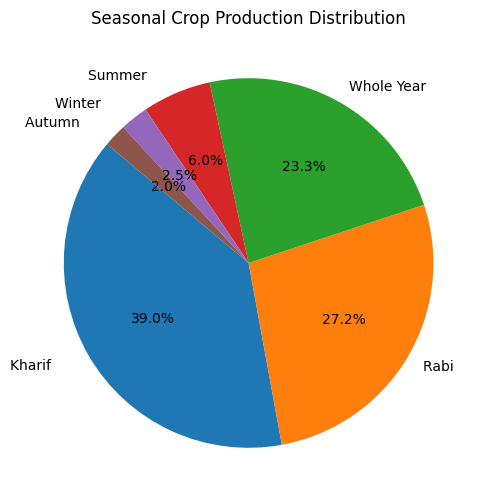

In [17]:
season_distribution = df['Season'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Seasonal Crop Production Distribution")
plt.show()


BAR CHART REPRESENTATION

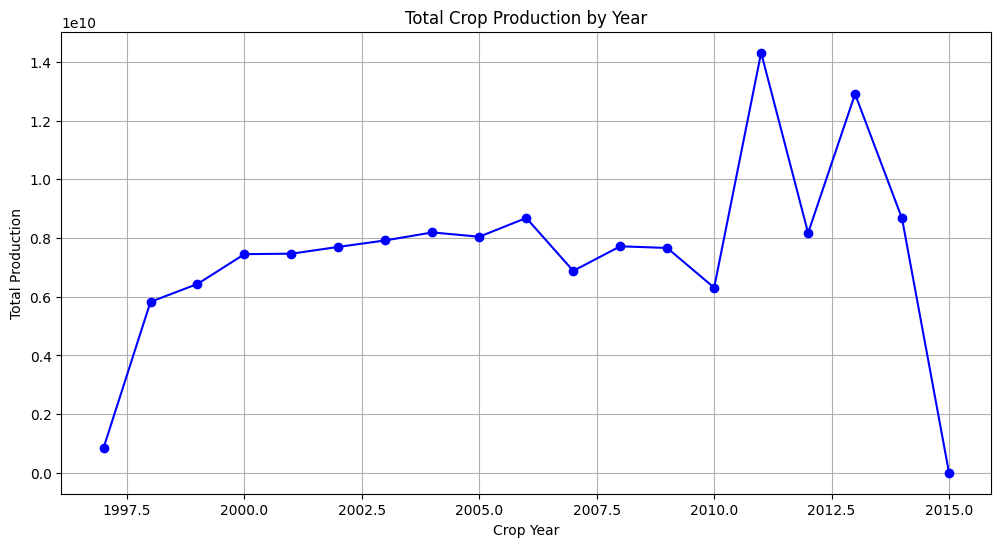

In [41]:
annual_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(annual_production['Crop_Year'], annual_production['Production'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Total Crop Production by Year')
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.grid(True)

# Show the plot
plt.show()

DATA TRANSFORMATION

In [28]:
#handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Production'] = imputer.fit_transform(df[['Production']])
df['Area'] = imputer.fit_transform(df[['Area']])

#encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['State_Name', 'District_Name', 'Season', 'Crop'], drop_first=True)

le = LabelEncoder()
df.loc[:,'Crop_Encoded'] = le.fit_transform(df['Crop'])
df.loc[:,'Season_Encoded'] = le.fit_transform(df['Season'])

df.info

<bound method DataFrame.info of                          State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246085                  West Bengal       PURULIA       2014  Summer        
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop    Area  Produc

In [27]:
#log transformation of area and production to reduce skewness
df.loc[:,'Area_Log'] = np.log1p(df['Area'])
df.loc[:,'Production_Log'] = np.log1p(df['Production'])
df.info

<bound method DataFrame.info of                          State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246085                  West Bengal       PURULIA       2014  Summer        
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop    Area  Produc

In [26]:
#Feature interaction to get new trend in the data
df.loc[:,'Area_CropYear'] = df['Area'] * df['Crop_Year']
df.loc[:,'Area_Season'] = df['Area'] * df['Season_Encoded']

#aggregate features
state_season_agg = df.groupby(['State_Name', 'Season']).agg({
    'Production': ['mean', 'sum', 'std'],
    'Area': ['mean', 'sum', 'std']
}).reset_index()

#removing outliers
from scipy import stats

df = df[(np.abs(stats.zscore(df[['Area', 'Production']])) < 3).all(axis=1)]

#scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Area_Scaled', 'Production_Scaled']] = scaler.fit_transform(df[['Area', 'Production']])

#feature selection
from sklearn.feature_selection import SelectKBest, f_regression
X = df_encoded.drop('Production', axis=1)
y = df_encoded['Production']

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)



Selected Features: Index(['Area', 'Area_Log', 'Production_Log', 'Area_CropYear', 'Area_Season',
       'Area_Scaled', 'Production_Scaled', 'Season_Whole Year ', 'Crop_Potato',
       'Crop_Sugarcane'],
      dtype='object')


TREND OF PRODUCTION OVER CROP YEARS

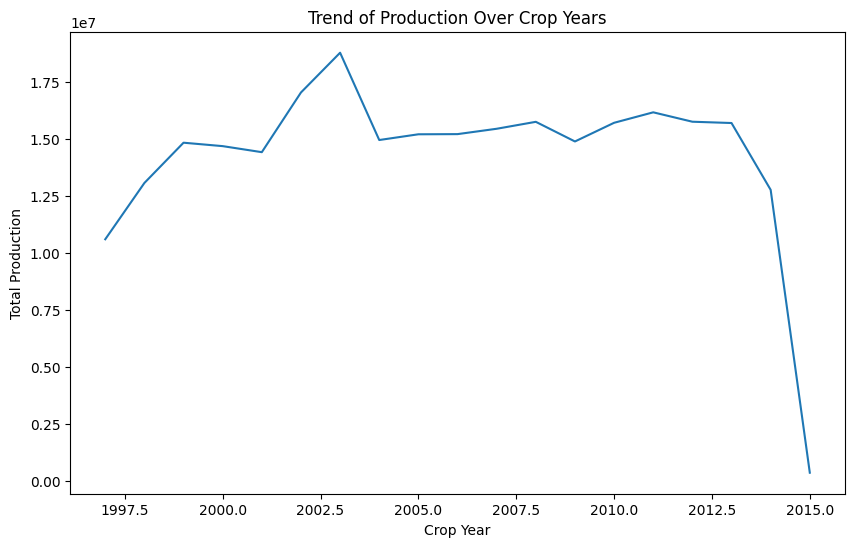

In [32]:
plt.figure(figsize=(10, 6))
df.groupby('Crop_Year')['Production'].sum().plot(kind='line')
plt.title('Trend of Production Over Crop Years')
plt.ylabel('Total Production')
plt.xlabel('Crop Year')
plt.show()


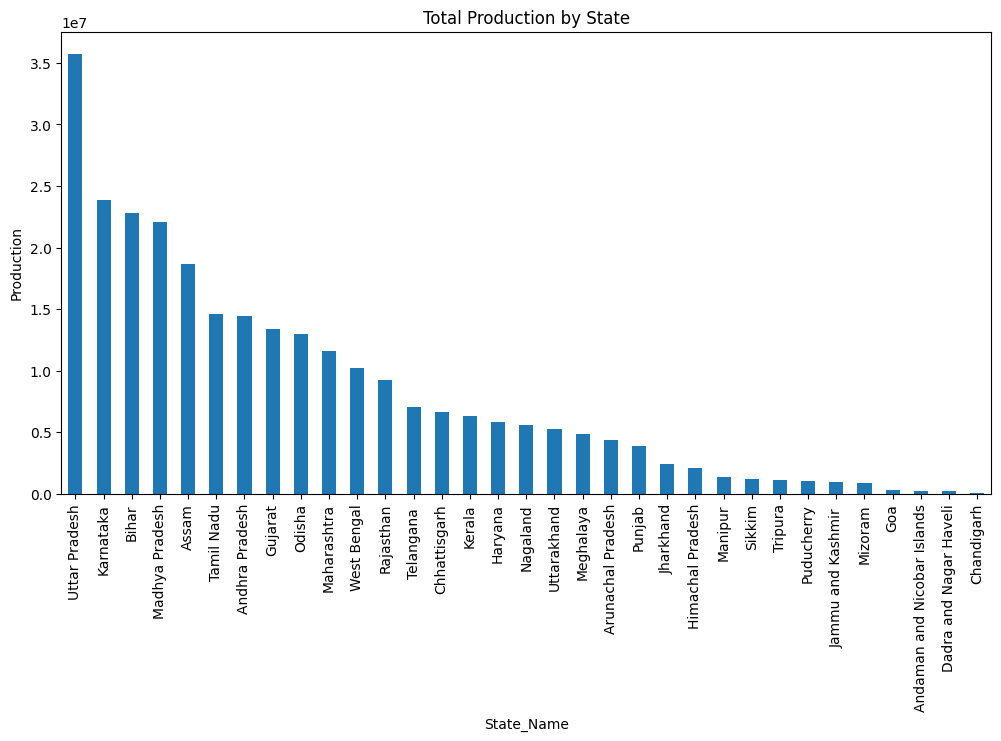

In [35]:
plt.figure(figsize=(12, 6))
df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Production by State')
plt.ylabel('Production')
plt.show()


COORELATION MATRIX OF THE DATA

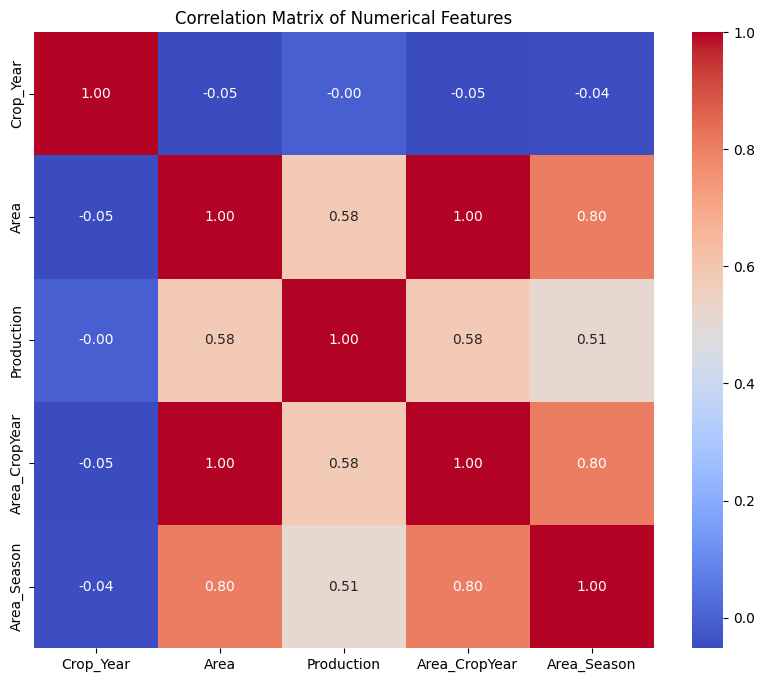

In [38]:
correlation_matrix = df[['Crop_Year', 'Area', 'Production', 'Area_CropYear', 'Area_Season']].corr()

# Plotting the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

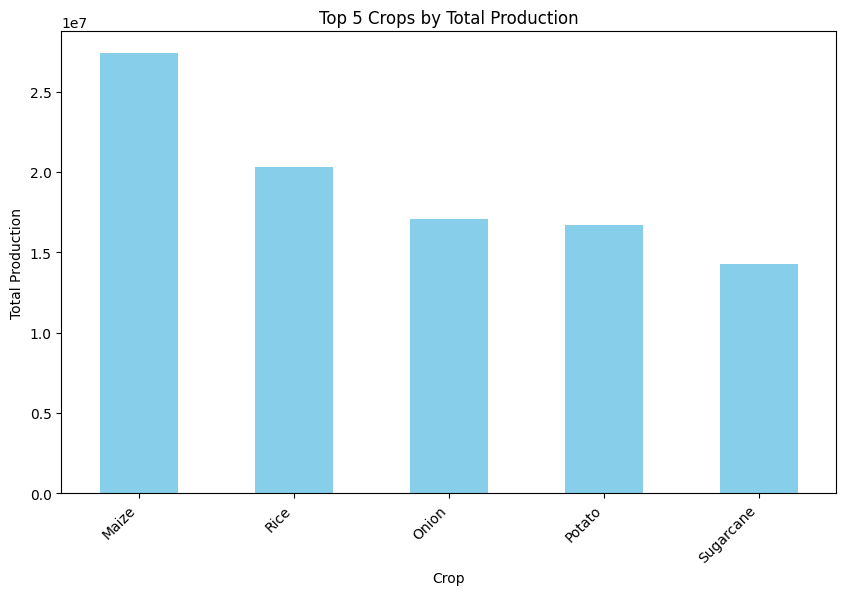

In [39]:
crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)

# Select the top 5 crops
top_5_crops = crop_production.head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_5_crops.plot(kind='bar', color='skyblue')
plt.title('Top 5 Crops by Total Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.show()